In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import keras
from keras import optimizers

Using TensorFlow backend.


# 此代码仅设置迭代10次，需要什么效果自行设置

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# fashion_mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

batch_size=128
epochs=10

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



|Label | Class|
  ---|----
 0 | T恤（T-shirt/top）
 1 | 裤子（Trouser）
 2 | 套头衫（Pullover）
 3 | 连衣裙（Dress）
 4 | 外套（Coat）
 5 | 凉鞋（Sandal）
 6 | 衬衫（Shirt）
 7 | 运动鞋（Sneaker）
 8 | 包（Bag）
 9 | 靴子（Ankle boot）

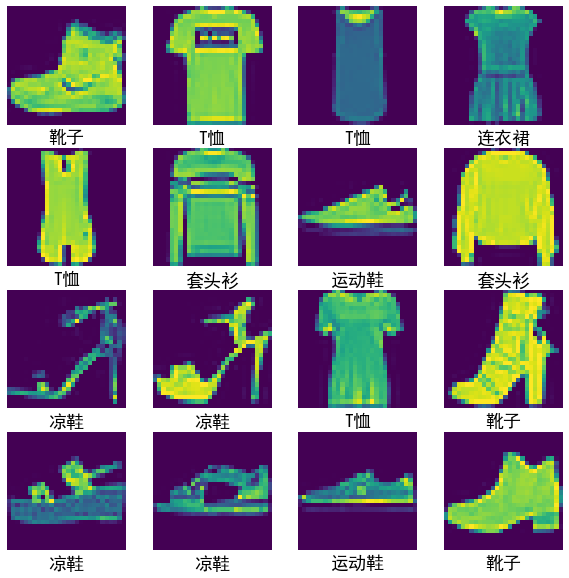

In [4]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['T恤', '裤子', '套头衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '靴子']
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,10))

for i in range(16):
    
    ax = plt.subplot(4,4,i+1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.xticks([])
    plt.yticks([])
#     plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.imshow(x_train[i])
    font = {'size': 18, }
    plt.xlabel(class_names[y_train[i]], font,)
plt.show()

In [5]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# (28x28-300-10)
history1 = model1.fit(x_train, y_train,
              epochs=epochs, 
              batch_size=batch_size,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5086 - accuracy: 0.8202 - val_loss: 0.4334 - val_accuracy: 0.8453
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3865 - accuracy: 0.8603 - val_loss: 0.4139 - val_accuracy: 0.8512
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3540 - accuracy: 0.8715 - val_loss: 0.3855 - val_accuracy: 0.8637
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3311 - accuracy: 0.8792 - val_loss: 0.3692 - val_accuracy: 0.8689
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3090 - accuracy: 0.8859 - val_loss: 0.3518 - val_accuracy: 0.8747
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2924 - accuracy: 0.8937 - val_loss: 0.3586 - val_accuracy: 0.8702
Epoch 7/10
60000/60000 [==============================] 

In [8]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1000, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# (28x28-1000-10)
history2 = model2.fit(x_train, y_train,
              epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5073 - accuracy: 0.8184 - val_loss: 0.4637 - val_accuracy: 0.8378
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3962 - accuracy: 0.8563 - val_loss: 0.4292 - val_accuracy: 0.8484
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3644 - accuracy: 0.8672 - val_loss: 0.3950 - val_accuracy: 0.8596
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3366 - accuracy: 0.8758 - val_loss: 0.3697 - val_accuracy: 0.8684
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3185 - accuracy: 0.8831 - val_loss: 0.3756 - val_accuracy: 0.8629
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.3536 - val_accuracy: 0.8732
Epoch 7/10
60000/60000 [==============================] 

In [10]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='tanh'),
  tf.keras.layers.Dense(100, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# (28x28-300-100-10)
history3 = model3.fit(x_train, y_train, 
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4839 - accuracy: 0.8265 - val_loss: 0.4219 - val_accuracy: 0.8463
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3684 - accuracy: 0.8662 - val_loss: 0.3920 - val_accuracy: 0.8568
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3351 - accuracy: 0.8779 - val_loss: 0.3731 - val_accuracy: 0.8638
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3073 - accuracy: 0.8873 - val_loss: 0.3645 - val_accuracy: 0.8662
Epoch 5/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2915 - accuracy: 0.8923 - val_loss: 0.3489 - val_accuracy: 0.8723
Epoch 6/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2777 - accuracy: 0.8975 - val_loss: 0.3353 - val_accuracy: 0.8787
Epoch 7/10
60000/60000 [==============================] 

In [12]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(500, activation='tanh'),
  tf.keras.layers.Dense(150, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_8 (Dense)              (None, 150)               75150     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 469,160
Trainable params: 469,160
Non-trainable params: 0
_________________________________________________________________


In [14]:
# (28x28-500-150-10)
history4 = model4.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4880 - accuracy: 0.8229 - val_loss: 0.4345 - val_accuracy: 0.8411
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3665 - accuracy: 0.8651 - val_loss: 0.3900 - val_accuracy: 0.8600
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3315 - accuracy: 0.8779 - val_loss: 0.3627 - val_accuracy: 0.8679
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3080 - accuracy: 0.8859 - val_loss: 0.3516 - val_accuracy: 0.8729
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2887 - accuracy: 0.8936 - val_loss: 0.3390 - val_accuracy: 0.8786
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2758 - accuracy: 0.8981 - val_loss: 0.3364 - val_accuracy: 0.8758
Epoch 7/10
60000/60000 [==============================] 

In [15]:
model5 = Sequential()
model5.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(16, (5, 5), activation='tanh'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(120, (5, 5), activation='tanh'))
model5.add(Flatten())
model5.add(Dense(84, activation='tanh'))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 迎合需要传入的数据类型（num, 28, 28, 1） 单通道
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [17]:
# LeNet
history5 = model5.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.5523 - accuracy: 0.7991 - val_loss: 0.4283 - val_accuracy: 0.8442
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3632 - accuracy: 0.8679 - val_loss: 0.3666 - val_accuracy: 0.8669
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3190 - accuracy: 0.8821 - val_loss: 0.3382 - val_accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2891 - accuracy: 0.8929 - val_loss: 0.3166 - val_accuracy: 0.8868
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2703 - accuracy: 0.9000 - val_loss: 0.3137 - val_accuracy: 0.8869
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2516 - accuracy: 0.9060 - val_loss: 0.3005 - val_accuracy: 0.8895
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

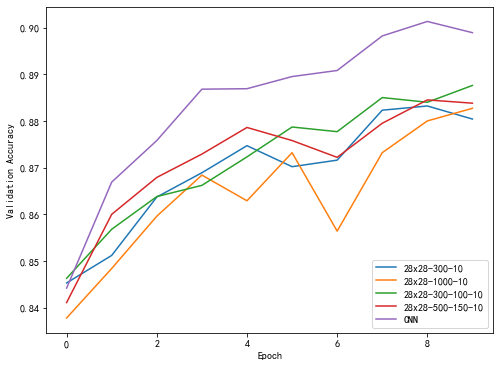

In [18]:
plt.figure(figsize=(8, 6))
epochs_range = range(epochs)
# plt.plot(epochs_range, history1.history['val_accuracy'], label='28x28-300-10')
# plt.plot(epochs_range, history2.history['val_accuracy'], label = '28x28-1000-10')
# plt.plot(epochs_range, history3.history['val_accuracy'], label = '28x28-300-100-10')
# plt.plot(epochs_range, history4.history['val_accuracy'], label = '28x28-500-150-10')
# plt.plot(epochs_range, history5.history['val_accuracy'], label = 'CNN')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')
# plt.savefig("Fashion-mnist.png")

# plt.subplot(1, 2, 1)
plt.plot(epochs_range, history1.history['val_accuracy'], label='28x28-300-10')
plt.plot(epochs_range, history2.history['val_accuracy'], label = '28x28-1000-10')
plt.plot(epochs_range, history3.history['val_accuracy'], label = '28x28-300-100-10')
plt.plot(epochs_range, history4.history['val_accuracy'], label = '28x28-500-150-10')
plt.plot(epochs_range, history5.history['val_accuracy'], label = 'CNN')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')


# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, history1.history['val_loss'], label='28x28-300-10')
# plt.plot(epochs_range, history2.history['val_loss'], label = '28x28-1000-10')
# plt.plot(epochs_range, history3.history['val_loss'], label = '28x28-300-100-10')
# plt.plot(epochs_range, history4.history['val_loss'], label = '28x28-500-150-10')
# plt.plot(epochs_range, history7.history['val_loss'], label = '28x28-500-150-10+Dropout(0.2)')
# plt.plot(epochs_range, history5.history['val_loss'], label = 'CNN')
# plt.plot(epochs_range, history6.history['val_loss'], label = 'CNN+Dropout(0.2)')
# plt.xlabel('Epoch')
# plt.ylabel('Validation Loss')
# plt.legend(loc='upper right')
# plt.savefig("All.png")
plt.show()

In [19]:
model15 = Sequential()
model15.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model15.add(MaxPooling2D(pool_size=(2, 2)))
model15.add(Conv2D(16, (5, 5), activation='tanh'))
model15.add(MaxPooling2D(pool_size=(2, 2)))
model15.add(Conv2D(120, (5, 5), activation='tanh'))
model15.add(Flatten())
model15.add(Dropout(0.2))
model15.add(Dense(84, activation='tanh'))
model15.add(Dropout(0.5))
model15.add(Dense(10, activation='softmax'))
model15.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# dropout(0.2+0.5)
history15 = model15.fit(x_train, y_train,
              epochs=epochs,
                      batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.6524 - accuracy: 0.7657 - val_loss: 0.4489 - val_accuracy: 0.8350
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.4344 - accuracy: 0.8480 - val_loss: 0.3983 - val_accuracy: 0.8557
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3876 - accuracy: 0.8633 - val_loss: 0.3492 - val_accuracy: 0.8735
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3609 - accuracy: 0.8745 - val_loss: 0.3487 - val_accuracy: 0.8746
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3427 - accuracy: 0.8804 - val_loss: 0.3314 - val_accuracy: 0.8823
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3224 - accuracy: 0.8882 - val_loss: 0.3198 - val_accuracy: 0.8842
Epoch 7/10
60000/60000 [==============================] - 3s 57us/st

In [21]:
model13 = Sequential()
model13.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model13.add(MaxPooling2D(pool_size=(2, 2)))
model13.add(Conv2D(16, (5, 5), activation='tanh'))
model13.add(MaxPooling2D(pool_size=(2, 2)))
model13.add(Conv2D(120, (5, 5), activation='tanh'))
model13.add(Flatten())
model13.add(Dense(84, activation='tanh'))
model13.add(Dropout(0.2))
model13.add(Dense(10, activation='softmax'))
model13.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# dropout(0.2)
history13 = model13.fit(x_train, y_train,
              epochs=epochs,
                        batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5710 - accuracy: 0.7935 - val_loss: 0.4252 - val_accuracy: 0.8464
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3826 - accuracy: 0.8621 - val_loss: 0.3539 - val_accuracy: 0.8717
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3383 - accuracy: 0.8780 - val_loss: 0.3296 - val_accuracy: 0.8797
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3117 - accuracy: 0.8869 - val_loss: 0.3193 - val_accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2924 - accuracy: 0.8938 - val_loss: 0.3177 - val_accuracy: 0.8843
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2759 - accuracy: 0.8997 - val_loss: 0.3017 - val_accuracy: 0.8919
Epoch 7/10
60000/60000 [==============================] - 3s 53us/st

In [23]:
model14 = Sequential()
model14.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model14.add(MaxPooling2D(pool_size=(2, 2)))
model14.add(Conv2D(16, (5, 5), activation='tanh'))
model14.add(MaxPooling2D(pool_size=(2, 2)))
model14.add(Conv2D(120, (5, 5), activation='tanh'))
model14.add(Flatten())
model14.add(Dense(84, activation='tanh'))
model14.add(Dropout(0.5))
model14.add(Dense(10, activation='softmax'))
model14.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# dropout(0.5)
history14 = model14.fit(x_train, y_train,
              epochs=epochs,
                        batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.6105 - accuracy: 0.7836 - val_loss: 0.4168 - val_accuracy: 0.8514
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4044 - accuracy: 0.8584 - val_loss: 0.3788 - val_accuracy: 0.8620
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3677 - accuracy: 0.8709 - val_loss: 0.3441 - val_accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3372 - accuracy: 0.8805 - val_loss: 0.3330 - val_accuracy: 0.8810
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3209 - accuracy: 0.8869 - val_loss: 0.3291 - val_accuracy: 0.8830
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3095 - accuracy: 0.8909 - val_loss: 0.3135 - val_accuracy: 0.8863
Epoch 7/10
60000/60000 [==============================] - 3s 53us/st

In [25]:
model16 = Sequential()
model16.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model16.add(MaxPooling2D(pool_size=(2, 2)))
model16.add(Conv2D(16, (5, 5), activation='tanh'))
model16.add(MaxPooling2D(pool_size=(2, 2)))
model16.add(Conv2D(120, (5, 5), activation='tanh'))
model16.add(Flatten())
model16.add(Dropout(0.5))
model16.add(Dense(84, activation='tanh'))
model16.add(Dropout(0.5))
model16.add(Dense(10, activation='softmax'))
model16.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# dropout(0.5+0.5)
history16 = model16.fit(x_train, y_train,
              epochs=epochs,
                        batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.7095 - accuracy: 0.7453 - val_loss: 0.4564 - val_accuracy: 0.8361
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.4726 - accuracy: 0.8351 - val_loss: 0.3895 - val_accuracy: 0.8618
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.4203 - accuracy: 0.8534 - val_loss: 0.3650 - val_accuracy: 0.8703
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3901 - accuracy: 0.8641 - val_loss: 0.3549 - val_accuracy: 0.8716
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3688 - accuracy: 0.8718 - val_loss: 0.3387 - val_accuracy: 0.8802
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3553 - accuracy: 0.8767 - val_loss: 0.3227 - val_accuracy: 0.8831
Epoch 7/10
60000/60000 [==============================] - 3s 55us/st

In [27]:
model17 = Sequential()
model17.add(Conv2D(6, kernel_size=(5, 5),
                 activation="tanh",
                 input_shape=(28, 28, 1),
                 padding='same'))
model17.add(MaxPooling2D(pool_size=(2, 2)))
model17.add(Conv2D(16, (5, 5), activation='tanh'))
model17.add(MaxPooling2D(pool_size=(2, 2)))
model17.add(Conv2D(120, (5, 5), activation='tanh'))
model17.add(Flatten())
model17.add(Dropout(0.2))
model17.add(Dense(84, activation='tanh'))
model17.add(Dropout(0.2))
model17.add(Dense(10, activation='softmax'))
model17.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# dropout(0.2+0.2)
history17 = model17.fit(x_train, y_train,
              epochs=epochs,
                        batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.5911 - accuracy: 0.7840 - val_loss: 0.4227 - val_accuracy: 0.8489
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3940 - accuracy: 0.8592 - val_loss: 0.3566 - val_accuracy: 0.8724
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3537 - accuracy: 0.8730 - val_loss: 0.3449 - val_accuracy: 0.8753
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3260 - accuracy: 0.8828 - val_loss: 0.3212 - val_accuracy: 0.8873
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3106 - accuracy: 0.8887 - val_loss: 0.3161 - val_accuracy: 0.8866
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2968 - accuracy: 0.8920 - val_loss: 0.3082 - val_accuracy: 0.8909
Epoch 7/10
60000/60000 [==============================] - 3s 53us/st

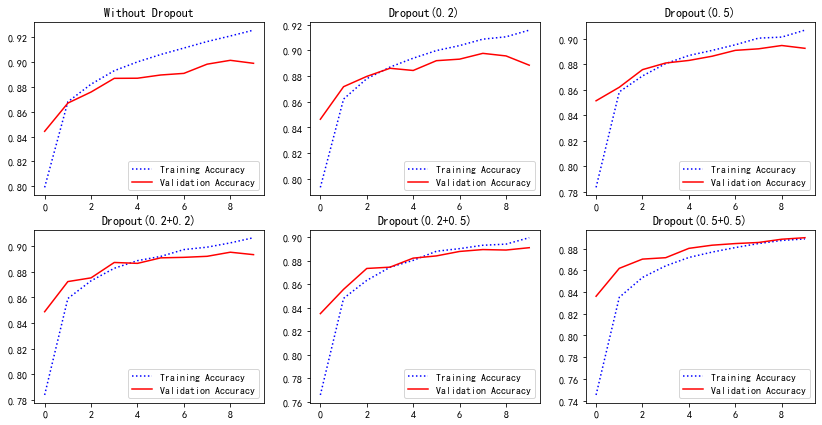

In [29]:
epochs_range = range(epochs)

plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
plt.plot(epochs_range, history5.history['accuracy'], label='Training Accuracy',color='b',linestyle=":" )
plt.plot(epochs_range, history5.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Without Dropout')

plt.subplot(2, 3, 2)
plt.plot(epochs_range, history13.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history13.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Dropout(0.2)')

plt.subplot(2, 3, 3)
plt.plot(epochs_range, history14.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history14.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Dropout(0.5)')

plt.subplot(2, 3, 4)
plt.plot(epochs_range, history17.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history17.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Dropout(0.2+0.2)')

plt.subplot(2, 3, 5)
plt.plot(epochs_range, history15.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history15.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Dropout(0.2+0.5)')

plt.subplot(2, 3, 6)
plt.plot(epochs_range, history16.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history16.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Dropout(0.5+0.5)')

# plt.savefig("Dropout.png")
plt.show()

In [30]:
model10 = Sequential()
model10.add(Conv2D(6, kernel_size=(5, 5),
                 activation="relu",
                 input_shape=(28, 28, 1),
                 padding='same'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(16, (5, 5), activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(120, (5, 5), activation='relu'))
model10.add(Flatten())
model10.add(Dense(84, activation='relu'))
model10.add(Dense(10, activation='softmax'))
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model10.compile(optimizer=rmsprop,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# RMSprop
history10 = model10.fit(x_train, y_train,
              epochs=epochs,
                        batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.7081 - accuracy: 0.7350 - val_loss: 0.4903 - val_accuracy: 0.8224
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4228 - accuracy: 0.8459 - val_loss: 0.3990 - val_accuracy: 0.8561
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3561 - accuracy: 0.8704 - val_loss: 0.3866 - val_accuracy: 0.8669
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3206 - accuracy: 0.8828 - val_loss: 0.3598 - val_accuracy: 0.8682
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2938 - accuracy: 0.8923 - val_loss: 0.3296 - val_accuracy: 0.8815
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2734 - accuracy: 0.9000 - val_loss: 0.3041 - val_accuracy: 0.8904
Epoch 7/10
60000/60000 [==============================] - 3s 49us/st

In [32]:
model12 = Sequential()
model12.add(Conv2D(6, kernel_size=(5, 5),
                 activation="relu",
                 input_shape=(28, 28, 1),
                 padding='same'))
model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Conv2D(16, (5, 5), activation='relu'))
model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Conv2D(120, (5, 5), activation='relu'))
model12.add(Flatten())
model12.add(Dense(84, activation='relu'))
model12.add(Dense(10, activation='softmax'))
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model12.compile(optimizer=adagrad,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Adagrad
history12 = model12.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.5962 - accuracy: 0.7790 - val_loss: 0.4537 - val_accuracy: 0.8350
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.4119 - accuracy: 0.8528 - val_loss: 0.4123 - val_accuracy: 0.8528
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3738 - accuracy: 0.8657 - val_loss: 0.3807 - val_accuracy: 0.8623
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3526 - accuracy: 0.8720 - val_loss: 0.3708 - val_accuracy: 0.8666
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3387 - accuracy: 0.8771 - val_loss: 0.3617 - val_accuracy: 0.8692
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3262 - accuracy: 0.8826 - val_loss: 0.3474 - val_accuracy: 0.8753
Epoch 7/10
60000/60000 [==============================] - 3s 47us/st

In [34]:
model11 = Sequential()
model11.add(Conv2D(6, kernel_size=(5, 5),
                 activation="relu",
                 input_shape=(28, 28, 1),
                 padding='same'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Conv2D(16, (5, 5), activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Conv2D(120, (5, 5), activation='relu'))
model11.add(Flatten())
model11.add(Dense(84, activation='relu'))
model11.add(Dense(10, activation='softmax'))
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model11.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Adam
history11 = model11.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.6583 - accuracy: 0.7568 - val_loss: 0.4958 - val_accuracy: 0.8103
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4296 - accuracy: 0.8457 - val_loss: 0.4121 - val_accuracy: 0.8533
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3705 - accuracy: 0.8657 - val_loss: 0.3774 - val_accuracy: 0.8643
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3382 - accuracy: 0.8773 - val_loss: 0.3453 - val_accuracy: 0.8770
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3097 - accuracy: 0.8874 - val_loss: 0.3306 - val_accuracy: 0.8831
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2959 - accuracy: 0.8921 - val_loss: 0.3232 - val_accuracy: 0.8811
Epoch 7/10
60000/60000 [==============================] - 3s 50us/st

In [36]:
model18 = Sequential()
model18.add(Conv2D(6, kernel_size=(5, 5),
                 activation="relu",
                 input_shape=(28, 28, 1),
                 padding='same'))
model18.add(MaxPooling2D(pool_size=(2, 2)))
model18.add(Conv2D(16, (5, 5), activation='relu'))
model18.add(MaxPooling2D(pool_size=(2, 2)))
model18.add(Conv2D(120, (5, 5), activation='relu'))
model18.add(Flatten())
model18.add(Dense(84, activation='relu'))
model18.add(Dense(10, activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model18.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Momentum
history18 = model18.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.7651 - accuracy: 0.7236 - val_loss: 0.5554 - val_accuracy: 0.7711
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4308 - accuracy: 0.8446 - val_loss: 0.5117 - val_accuracy: 0.7985
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3696 - accuracy: 0.8662 - val_loss: 0.3610 - val_accuracy: 0.8646
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3362 - accuracy: 0.8786 - val_loss: 0.3419 - val_accuracy: 0.8766
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3156 - accuracy: 0.8860 - val_loss: 0.3379 - val_accuracy: 0.8792
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2969 - accuracy: 0.8919 - val_loss: 0.3101 - val_accuracy: 0.8889
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

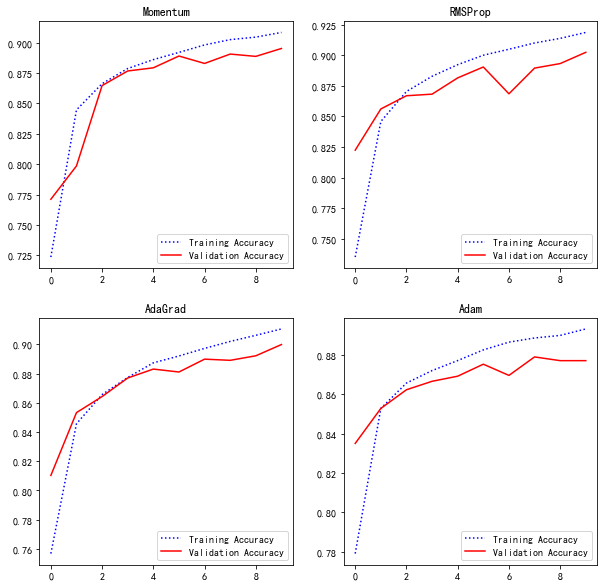

In [38]:
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history18.history['accuracy'], label='Training Accuracy',color='b',linestyle=":" )
plt.plot(epochs_range, history18.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Momentum')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history10.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history10.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('RMSProp')

plt.subplot(2, 2, 3)
plt.plot(epochs_range, history11.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history11.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('AdaGrad')

plt.subplot(2, 2, 4)
plt.plot(epochs_range, history12.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history12.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Adam')

# plt.savefig("Adam-RMSProp-SGD-AdaGrad2.png")
plt.show()

In [39]:
model8 = Sequential()
model8.add(Conv2D(6, kernel_size=(5, 5),
                 activation='sigmoid',
                 input_shape=(28, 28, 1),
                 padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Conv2D(16, (5, 5), activation='sigmoid'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Conv2D(120, (5, 5), activation='sigmoid'))
model8.add(Flatten())
model8.add(Dense(84, activation='sigmoid'))
model8.add(Dense(10, activation='softmax'))
model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# tanh
history8 = model8.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5491 - accuracy: 0.8032 - val_loss: 0.4081 - val_accuracy: 0.8544
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3619 - accuracy: 0.8674 - val_loss: 0.3688 - val_accuracy: 0.8683
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3165 - accuracy: 0.8852 - val_loss: 0.3296 - val_accuracy: 0.8831
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2888 - accuracy: 0.8938 - val_loss: 0.3156 - val_accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2685 - accuracy: 0.9002 - val_loss: 0.2976 - val_accuracy: 0.8929
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2543 - accuracy: 0.9080 - val_loss: 0.2947 - val_accuracy: 0.8908
Epoch 7/10
60000/60000 [==============================] - 3s 55us/st

In [41]:
model9 = Sequential()
model9.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28, 28, 1),
                 padding='same'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Conv2D(16, (5, 5), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Conv2D(120, (5, 5), activation='relu'))
model9.add(Flatten())
model9.add(Dense(84, activation='relu'))
model9.add(Dense(10, activation='softmax'))
model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# relu
history9 = model9.fit(x_train, y_train,
              epochs=epochs, 
                      batch_size=batch_size,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.6596 - accuracy: 0.7542 - val_loss: 0.4723 - val_accuracy: 0.8292
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.4152 - accuracy: 0.8509 - val_loss: 0.4142 - val_accuracy: 0.8530
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3575 - accuracy: 0.8716 - val_loss: 0.3626 - val_accuracy: 0.8695
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3218 - accuracy: 0.8842 - val_loss: 0.3534 - val_accuracy: 0.8741
Epoch 5/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.2998 - accuracy: 0.8912 - val_loss: 0.3268 - val_accuracy: 0.8862
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2849 - accuracy: 0.8968 - val_loss: 0.3125 - val_accuracy: 0.8887
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

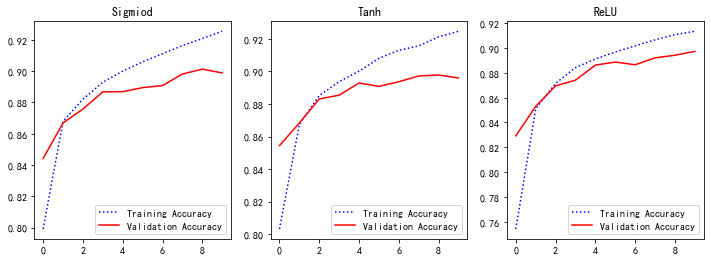

In [43]:
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, history5.history['accuracy'], label='Training Accuracy',color='b',linestyle=":" )
plt.plot(epochs_range, history5.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Tanh')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, history8.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history8.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('Sigmoid')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, history9.history['accuracy'], label='Training Accuracy',color="b", linestyle=":")
plt.plot(epochs_range, history9.history['val_accuracy'], label='Validation Accuracy',color="r")
plt.legend(loc='lower right')
plt.title('ReLU')
# plt.savefig("Sigmoid-Tanh-ReLU.png")
plt.show()